In [1]:
#!pip install pandas


In [2]:
import os
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd

plt.style.use("fivethirtyeight")

In [4]:
class Perceptron:
    def __init__(self, eta: float=None, epochs: int=None):
        # epochs means number of interations 
        self.weights = np.random.randn(3) * 1e-4
        # taking 3 random variables ( w1,w2,w3) and we multiply it by 10**-4 to keep the wieghts low 
        self.eta = eta # learning rate
        self.epochs = epochs # iterations
        
        
    # used _z to make the method private 
    # check the explaination below 
    def _z_outcome(self, inputs, weights):
        return np.dot(inputs, weights)
    
    def activation_function(self, z):
        return np.where(z > 0, 1, 0)
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        
        # adding a row of bais value to the X matrix c_ means concatenate 
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for epoch >> {epoch + 1}")
            print("--"*10)
            
            z = self._z_outcome(X_with_bias, self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error)
            print(f"updated weights after epoch: {epoch + 1}/{self.epochs}: \n{self.weights}")
            print(f"##"*10)
            
            
    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        z = self._z_outcome(X_with_bias, self.weights)
        return self.activation_function(z)
    
    
    

Z vaule explanation: 
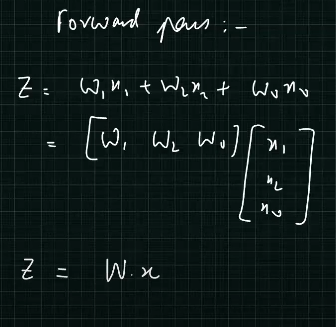

In [5]:
# creating a OR gate data in dictionary format 
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,1]
}

# cverting to data frame
df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [6]:
# removing y from the data 
def prepare_data(df, target_col="y"):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    return X, y

In [7]:
X, y = prepare_data(df_OR)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [8]:
y

0    0
1    1
2    1
3    1
Name: y, dtype: int64

In [9]:
X, y = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta=ETA, epochs=EPOCHS)

model_or.fit(X, y)

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.19991461  0.19972093 -0.29998665]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[ 0.19991461  0.19972093 -0.19998665]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.19991461  0.19972093 -0.09998665]
####################
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype

In [41]:
model_or.predict(X=[[0,0]])

array([0])

In [52]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,0,0,1]
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [53]:
X, y = prepare_data(df_AND)

ETA = 0.1
EPOCHS = 10

model_and = Perceptron(eta=ETA, epochs=EPOCHS)

model_and.fit(X, y)

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 1 1]
error: 
0    0
1    0
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[-9.98614363e-02 -7.11364644e-05  1.00061982e-01]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[1.38563652e-04 9.99288635e-02 6.19821833e-05]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[-9.98614363e-02 -7.11364644e-05  2.00061982e-01]
####################
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1 

In [54]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y" : [0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)

df_XOR

X, y = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 10

model_xor = Perceptron(eta=ETA, epochs=EPOCHS)

model_xor.fit(X, y)

X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
[ 0.0998537   0.09997827 -0.19998335]
####################
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
[-1.46303533e-04 -2.17309364e-05  1.66526037e-05]
####################
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
[ 0.0998537   0.09997827 -0.19998335]
####################
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Na

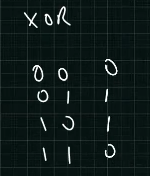